# Aula 4

---

**Saulo Martiello Mastelini**<br>
Candidato a Ph.D. pelo ICMC-USP<br>
Online Machine Learning

Página pessoal: [smastelini](https://smastelini.github.io/)</br>
e-mail: saulomastelini@gmail.com

---

## Sumário:

- Regressão linear
- Regressão logística
- Support Vector Machines
- Regularização
- Métricas de avaliação para regressão
- Visualização de fronteiras de decisão

---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn import linear_model as lm

## 1. Modelos lineares (regressão)

In [3]:
x, y = make_regression(
    n_samples=200,
    n_features=1,
    n_informative=1,
    noise=10,
    random_state=42
)

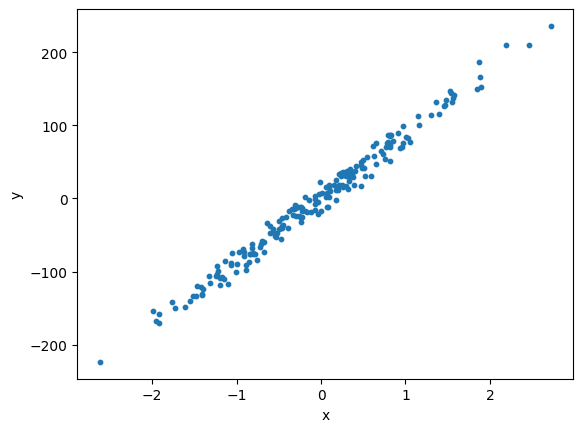

In [4]:
plt.scatter(x=x[:, 0], y=y, s=10)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### 1.1. Voltando para álgebra linear

- Equação da reta, em sua forma mais básica:
$$y = w_1 x + w_0$$
- $Ax = b$
    - $n$ linhas e $m$ colunas
- Solução (num mundo ideal)
    - $x = A^{-1}b$
- $A$ deve ser quadrada
    - $m = n$
- $A$ deve ser inversível
- Não pode haver haver correlação entre as colunas em A
- E assim por diante...
- Se esses requerimentos não acontecem, não é possível encontrar uma solução exata
- Regressão simples x múltipla
    - Estamos falando de tarefas de regressão aqui

- ML cria também modelos lineares
    - Em geral, regressão múltipla

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2 + ... + w_n x_n$$

- O termo `w_0` é chamado bias, ou também, intercepto (_intercept_).
    - O ponto onde a reta resultante cruza o eixo y (eixo das ordenadas)
        - x é o eixo das abcissas

- _Ordinary Least Squares_: versão básica da regressão
    - Minimiza $\min\limits_w\|Xw - y\|_2^2$

- A resolução do sistema linear resultante nos dará os valores de `w` (coeficientes lineares)
    - Na vida real, os requisitos necessários para inverter $X$ raramente são atendidos
    - Solução aproximada!

- Usando o jargão de ML:
    - $X = A$
    - $y = b$

In [5]:
lr = lm.LinearRegression()
lr.fit(x, y)

LinearRegression()

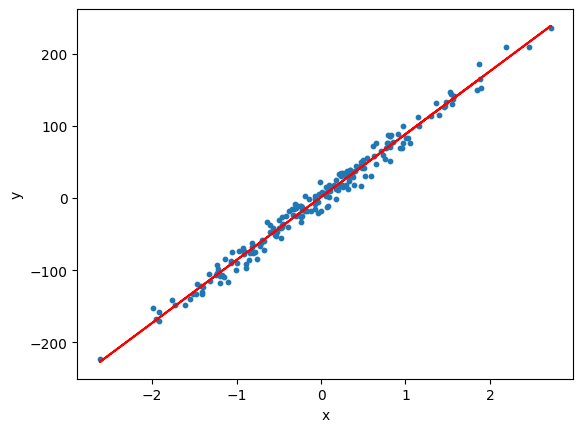

In [6]:
plt.scatter(x=x[:, 0], y=y, s=10)
plt.plot(x[:, 0], lr.predict(x), c="red")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [7]:
lr.coef_, lr.intercept_

(array([87.36641987]), 1.4285139010211898)

- Estratégias usuais: _Singular Value Decomposition_ (SVD) e _Stochastic Gradient Descent_ (SGD)
- O SVD também é utilizado na Análise de Componentes Principais (PCA - _Principal Component Analysis_)
    - Que abordaremos na aula de hoje
- O SGD é um componente essencial das redes neurais e deep learning!
    - Iremos abordá-lo futuramente
- Tanto o SVD, quanto o SGD podem ser usado para resolverem sistemas lineares
    - Parece pouco?
    - Espero mudar sua opinião

### 1.2. Singular Value Decomposition

- SVD: $A = U \Sigma V^T$
    - Decompõe uma matriz com dimensões quaisquer no produto de três matrizes
    - $A$: $m\times n$
    - $U$: $m \times m$
    - $\Sigma$: $m \times n$
    - $V$: $n \times n$
- $U$ e $V$ são matrizes unitárias:
    - $UU^T = I$
    - $VV^T = I \rightarrow$ matriz identidade
        - Diagonal com $1$ e o restante $0$
- $\Sigma$ é uma matriz diagonal
    - Todos os valores (exceto na diagonal) são zero
- Aproximamos $A^{-1}$ utilizando $\text{SVD}^{-1}$
- Propriedade da SVD:
    - $(U\Sigma V^T)^{-1} = V\Sigma^{-1}U^T = A^+$
    
- Nós utilizamos $A^+$ como uma aproximação para $A^{-1}$

- Aplicando o SVD no nosso problema introdutório:



In [8]:
# Adicionamos uma coluna com 1's para representar o termo de bias:
#    1 x qualquer coisa = qualquer coisa
A = np.column_stack([x, np.ones(x.shape[0])])

In [9]:
U, S, Vt = np.linalg.svd(A, full_matrices=False)

In [10]:
U.shape, Vt.shape, np.diag(S).shape

((200, 2), (2, 2), (2, 2))

In [11]:
w = Vt.T @ np.linalg.inv(np.diag(S)) @ U.T @ y


In [12]:
w

array([87.36641987,  1.4285139 ])

- Agora sabemos de onde os coeficientes vêm.
- Propriedade interessante do SVD:
    - Podemos combinar os elementos de $U$ e $V^T$ escalados pela entrada correspondente em $\Sigma$
    - Reconstruir de forma aproximada a matriz original
    
<figure>
      
</figure>

<figure>
  <img src="https://sthalles.github.io/assets/svd-for-regression/rank-approximations.png" width="700px">
  <figcaption>Fonte: <a href="https://sthalles.github.io/svd-for-regression/">Understanding Linear Regression using the Singular Value Decomposition
</a>
  </figcaption>
</figure>

- Essa é a base da PCA

- Podemos utilizar os modelos lineares para resolver problemas mais realísticos.


In [13]:
X, y = make_regression(
    n_samples=200,
    n_features=10,
    n_informative=8,
    random_state=42,
    noise=1
)

## 2. Métricas de desempenho para regressão

- Mean Absolute Error (MAE)

$$MAE(y, \hat{y}) = \frac{1}{N}\sum_{i=0}^N |y_i - \hat{y}_i|$$

- Root Mean Square Error (RMSE)

$$RMSE(y, \hat{y}) = \frac{1}{N}\sqrt{\sum_{i=0}^N (y_i - \hat{y}_i)^2}$$

- Coeficiente de Determinação (R2)
    - Indica quão bom está o seu modelo
    - Intervalo $(-\infty, 1]$ (1 é o melhor valor possível)
    - Deve ser utilizado em conjunto com métricas de erro

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 3. Regularização

- Alteração da função de otimização para fazer os pesos seguirem um certo comportamento.
- Forma de evitar _overfitting_ e garantir que os modelos lineares assumam um certo comportamento.

### 3.1. LASSO

- _Least Absolute Shrinkage and Selection Operator_
- Regularização `l1`.
- Adiciona a magnitude absoluta dos pesos à função de otimização.
- Força alguns pesos a se tornarem iguais a zero.
    - Seleção de atributos :D

### 3.2. Ridge Regression

- Regularização `l2`
- Adiciona a magnitude quadrática dos pesos à função de otimização

### 3.3. Elastic Net

- Combinação ponderada da regularização `l1` e `l2`


## 4. Regressão logística

- Apesar do nome, é um algoritmo de classificação
- Tipicamente classificação binária
    - Multiclasse: one vs. rest
        - Criar vários modelos binários
- Usa a função _logit_ ou função sigmoide
    - Varia entre 0 e 1
    
$$sigmoid(\tilde{x}) = \dfrac{1}{1 + e^{-\tilde{x}}}$$

<img src="img/a4/logistic-reg.webp" width="400">
    <figcaption>Exemplo 1: regressão logística. Fonte: James Thorn, via <a href="https://towardsdatascience.com/logistic-regression-explained-9ee73cede081">Towards Data Science</a></figcaption>
</img>

- $\tilde{x}$ é a combinação linear dos atributos do problema
- Estratégias de otimização normalmente utilizadas:
    - Gradiente descendente
    - _Maximum likelihood_ (máxima verossimilhança)
        - Estratégia para encontrar os parâmetros de um modelo probabilístico
    
<img src="img/a4/logistic-fitted.webp" width="400">
    <figcaption>Exemplo 2: logistic regression. Fonte: James Thorn, via <a href="https://towardsdatascience.com/logistic-regression-explained-9ee73cede081">Towards Data Science</a></figcaption>
</img>

In [15]:
# TODO example

## 5. Support Vector Machine (SVM)

- Modelo linear, por definição
- Modela relações não-lineares através da aplicação de funções kernel
    - Transformam os dados em dimensões para proporcionar a resolução

In [51]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_validate, KFold
from sklearn.svm import SVC

In [39]:
X, y = load_digits(return_X_y=True, as_frame=True)

In [54]:
res_linear = cross_validate(
    SVC(kernel="linear"),
    X=X,
    y=y,
    scoring=["accuracy", "f1_macro"],
    cv=KFold(n_splits=10, shuffle=True, random_state=8)
)

res_linear = pd.DataFrame(res_linear)
res_linear

,fit_time,score_time,test_accuracy,test_f1_macro
0,0.033979,0.005714,0.977778,0.978322
1,0.031059,0.005279,0.977778,0.978284
2,0.031511,0.005273,1.000000,1.000000
3,0.032194,0.005387,0.988889,0.989198
4,0.030826,0.005255,0.994444,0.994039
5,0.030745,0.005351,0.972222,0.969989
6,0.030233,0.005292,0.988889,0.989144
7,0.030819,0.005227,0.977654,0.979053
8,0.030456,0.005100,0.972067,0.973247
9,0.031677,0.005166,0.972067,0.969367


In [55]:
res_linear.mean(axis=0)

fit_time         0.031350
score_time       0.005304
test_accuracy    0.982179
test_f1_macro    0.982064
dtype: float64

In [64]:
res_rbf = cross_validate(
    SVC(kernel="rbf"),
    X=X,
    y=y,
    scoring=["accuracy", "f1_macro"],
    cv=KFold(n_splits=10, shuffle=True, random_state=8)
)

res_rbf = pd.DataFrame(res_rbf)
res_rbf

,fit_time,score_time,test_accuracy,test_f1_macro
0,0.053965,0.018487,0.983333,0.981539
1,0.052880,0.018166,0.977778,0.978284
2,0.052639,0.020688,1.000000,1.000000
3,0.053613,0.018426,0.994444,0.995452
4,0.053244,0.017957,0.988889,0.988296
5,0.052210,0.018060,0.983333,0.983759
6,0.053412,0.018720,0.994444,0.994858
7,0.052289,0.020745,0.988827,0.989382
8,0.052764,0.017981,0.983240,0.984404
9,0.054246,0.018431,0.988827,0.988763


In [63]:
res_rbf.mean(axis=0)

fit_time         0.063224
score_time       0.023084
test_accuracy    0.988312
test_f1_macro    0.988474
dtype: float64

In [67]:
res_poly = cross_validate(
    SVC(kernel="poly"),
    X=X,
    y=y,
    scoring=["accuracy", "f1_macro"],
    cv=KFold(n_splits=10, shuffle=True, random_state=8)
)

res_poly = pd.DataFrame(res_poly)
res_poly

,fit_time,score_time,test_accuracy,test_f1_macro
0,0.037881,0.006390,0.994444,0.994747
1,0.036036,0.006365,0.977778,0.978284
2,0.037196,0.006262,1.000000,1.000000
3,0.036943,0.006327,1.000000,1.000000
4,0.036210,0.006010,0.994444,0.994039
5,0.035784,0.006294,0.988889,0.988516
6,0.036218,0.006104,0.994444,0.994858
7,0.036006,0.006132,0.983240,0.984457
8,0.036368,0.006088,0.983240,0.984612
9,0.036597,0.006053,0.988827,0.988060


In [68]:
res_poly.mean(axis=0)

fit_time         0.036524
score_time       0.006203
test_accuracy    0.990531
test_f1_macro    0.990757
dtype: float64

## 6. Exemplo prático

In [17]:
import pandas as pd

from sklearn.decomposition import PCA
from sklearn import linear_model as lm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


- Medir o número de octanas em amostras de gasolina ([Fonte dos dados](https://github.com/gustavovelascoh/octane-NIR))
- X: frequências medidas com NIR (Espectroscopia de Infravermelho Próximo)
- y: número de octanas

In [18]:
df = pd.read_csv("data/a4/gasoline.csv")
df.head()

,octane,NIR.900 nm,NIR.902 nm,NIR.904 nm,NIR.906 nm,NIR.908 nm,NIR.910 nm,NIR.912 nm,NIR.914 nm,NIR.916 nm,...,NIR.1682 nm,NIR.1684 nm,NIR.1686 nm,NIR.1688 nm,NIR.1690 nm,NIR.1692 nm,NIR.1694 nm,NIR.1696 nm,NIR.1698 nm,NIR.1700 nm
1,85.30,-0.050193,-0.045903,-0.042187,-0.037177,-0.033348,-0.031207,-0.030036,-0.031298,-0.034217,...,1.198461,1.224243,1.242645,1.250789,1.246626,1.250985,1.264189,1.244678,1.245913,1.221135
2,85.25,-0.044227,-0.039602,-0.035673,-0.030911,-0.026675,-0.023871,-0.022571,-0.025410,-0.028960,...,1.128877,1.148342,1.189116,1.223242,1.253306,1.282889,1.215065,1.225211,1.227985,1.198851
3,88.45,-0.046867,-0.041260,-0.036979,-0.031458,-0.026520,-0.023346,-0.021392,-0.024993,-0.029309,...,1.147964,1.167798,1.198287,1.237383,1.260979,1.276677,1.218871,1.223132,1.230321,1.208742
4,83.40,-0.046705,-0.042240,-0.038561,-0.034513,-0.030206,-0.027680,-0.026042,-0.028280,-0.030920,...,1.160089,1.169350,1.201066,1.233299,1.262966,1.272709,1.211068,1.215044,1.232655,1.206696
5,87.90,-0.050859,-0.045145,-0.041025,-0.036357,-0.032747,-0.031498,-0.031415,-0.034611,-0.037781,...,1.252712,1.238013,1.259616,1.273713,1.296524,1.299507,1.226448,1.230718,1.232864,1.202926


In [19]:
df.shape

(60, 402)

Muito mais colunas do que linhas.

- Precisaremos lidar com isso!

In [20]:
X = df.drop("octane", axis=1)
y = df["octane"]

cv = KFold(n_splits=10, shuffle=True, random_state=42)

Regressão linear sem regularização

In [21]:
y_pred = cross_val_predict(
    estimator=make_pipeline(StandardScaler(), lm.LinearRegression()),
    X=X,
    y=y,
    cv=cv,
)

In [22]:
mean_squared_error(y, y_pred, squared=False), r2_score(y, y_pred)

(0.2632387548981843, 0.9698996230840193)

In [23]:
y_pred_lasso = cross_val_predict(
    estimator=make_pipeline(StandardScaler(), lm.Lasso(alpha=0.01, max_iter=5000)),
    X=X,
    y=y,
    cv=cv,
)

In [24]:
mean_squared_error(y, y_pred_lasso, squared=False), r2_score(y, y_pred_lasso)

(0.23429628215285728, 0.9761546845354301)

In [25]:
lasso = make_pipeline(StandardScaler(), lm.Lasso(alpha=0.01, max_iter=5000))
lasso.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.01, max_iter=5000))])

In [26]:
lasso.steps

[('standardscaler', StandardScaler()),
 ('lasso', Lasso(alpha=0.01, max_iter=5000))]

In [27]:
np.where(lasso.steps[1][1].coef_ != 0)[0]

array([  6,   7,  42, 153, 159, 162, 165, 230, 231, 317, 366, 369, 392,
       393, 395, 396])

In [28]:
selecionados = np.where(lasso.steps[1][1].coef_ != 0)[0]

X.columns[selecionados]

Index(['NIR.912 nm', 'NIR.914 nm', 'NIR.984 nm', 'NIR.1206 nm', 'NIR.1218 nm',
       'NIR.1224 nm', 'NIR.1230 nm', 'NIR.1360 nm', 'NIR.1362 nm',
       'NIR.1534 nm', 'NIR.1632 nm', 'NIR.1638 nm', 'NIR.1684 nm',
       'NIR.1686 nm', 'NIR.1690 nm', 'NIR.1692 nm'],
      dtype='object')

Ridge regression

In [29]:
y_pred_ridge = cross_val_predict(
    estimator=make_pipeline(StandardScaler(), lm.Ridge()),
    X=X,
    y=y,
    cv=cv,
)

In [30]:
mean_squared_error(y, y_pred_ridge, squared=False), r2_score(y, y_pred_ridge)

0.22697726146959843

In [32]:
pca = PCA().fit(X)

np.cumsum(pca.explained_variance_ratio_)

array([0.72565138, 0.83903157, 0.90857414, 0.9545724 , 0.96697538,
       0.97664368, 0.9815837 , 0.98520879, 0.98853064, 0.99085276,
       0.99286189, 0.99402718, 0.9951294 , 0.99604761, 0.99675652,
       0.99734134, 0.99791114, 0.99838451, 0.99864347, 0.99887044,
       0.99904243, 0.99920281, 0.99931737, 0.99941332, 0.99950137,
       0.99958052, 0.99964409, 0.99969895, 0.99973876, 0.99977508,
       0.99980283, 0.99982687, 0.99984696, 0.99986489, 0.99988003,
       0.99989349, 0.99990554, 0.99991613, 0.99992551, 0.99993331,
       0.99994007, 0.99994625, 0.99995188, 0.99995707, 0.99996187,
       0.99996627, 0.99997034, 0.99997385, 0.99997729, 0.99998049,
       0.99998353, 0.9999863 , 0.999989  , 0.99999146, 0.9999938 ,
       0.9999957 , 0.99999733, 0.99999885, 1.        , 1.        ])

In [33]:
y_pred_pca = cross_val_predict(
    estimator=make_pipeline(PCA(n_components=5), StandardScaler(), lm.LinearRegression()),
    X=X,
    y=y,
    cv=cv,
)

In [34]:
mean_squared_error(y, y_pred_pca, squared=False), r2_score(y, y_pred_pca)

0.2544782495337878

In [104]:
from sklearn.svm import SVR

y_pred_svr = cross_val_predict(
    estimator=make_pipeline(StandardScaler(), SVR(kernel="poly", degree=2, epsilon=0.05)),
    X=X,
    y=y,
    cv=cv,
)

In [105]:
mean_squared_error(y, y_pred_svr, squared=False), r2_score(y, y_pred_svr)

(1.221343502483186, 0.8182074624658303)

# Tarefa